### Importing libraries

In [472]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [473]:
#setting seed

torch.manual_seed(42)

In [474]:
#checking if there is gpu

'gpu' if torch.cuda.is_available() else 'cpu'

'cpu'

In [475]:
from sklearn.datasets import make_blobs

In [476]:
# obtaining random samples of data for regression task

X, y = make_blobs(n_samples = 5000,n_features = 2, centers =5, shuffle = True, random_state =2023)

In [477]:
#checking row 1 in X
X[1]

array([-6.73267103, -2.0127809 ])

In [478]:
# checking target at row 1
y[1]

2

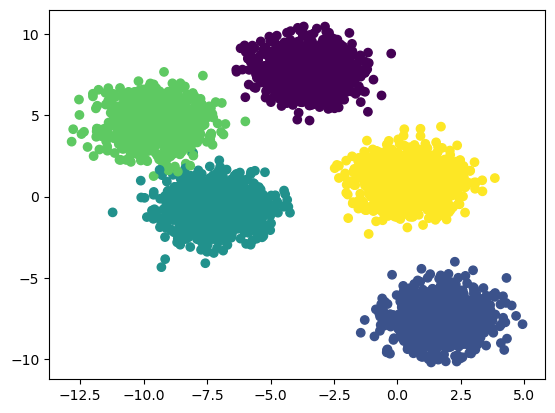

In [479]:
plt.scatter(X[:,0], X[:,1], c = y);

In [480]:
# combining the features(X) and target(y) 

data = pd.concat([pd.DataFrame(X, columns = [f'feature_{i+1}' for i in range(X.shape[1])]), pd.Series(y, name = 'target')],axis=1)

In [481]:
data.head()

,feature_1,feature_2,target
0,-5.420281,-0.083520,2
1,-6.732671,-2.012781,2
2,-3.175441,8.449562,0
3,-3.187485,8.217295,0
4,2.983708,-4.536178,1


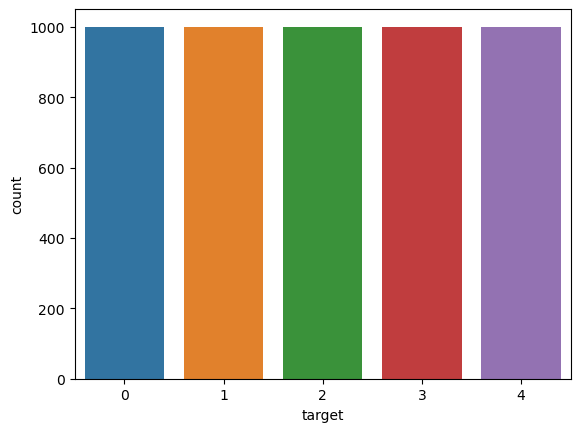

In [482]:
#histogram showing a normal distribution of the target variable
sns.countplot(data = data ,x = 'target');

In [483]:
# converting the values to torch float32 dtype

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.LongTensor)
print(X[:5], y[:5])

tensor([[-5.4203, -0.0835],
        [-6.7327, -2.0128],
        [-3.1754,  8.4496],
        [-3.1875,  8.2173],
        [ 2.9837, -4.5362]]) tensor([2, 2, 0, 0, 1])


In [484]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(x_train), len(x_test), len(y_train), len(y_test)

(4000, 1000, 4000, 1000)

In [485]:
class blobpredict(nn.Module):
    def __init__(self, input_features, hidden_units, out_features):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_features,hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units,2*hidden_units),
            nn.ReLU(),
            nn.Linear(2*hidden_units,4*hidden_units),
            nn.ReLU(),
            nn.Linear(4*hidden_units,out_features))

    def forward(self,x):
        x = self.main(x)

        return x

In [486]:
# instantiating the model from Mons class
model = blobpredict(2,20,5)

In [487]:
BATCH_SIZE = 64 #batches of data
trainset = TensorDataset(x_train, y_train)  #pytorch dataformat
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)  #pytorch data loading format
validset = TensorDataset(x_test, y_test)#pytorch dataformat
validloader = DataLoader(validset, batch_size=BATCH_SIZE, shuffle=True)#pytorch data loading format

In [488]:
len(trainloader)

63

In [489]:
next(iter(validloader))

[tensor([[ -0.5860,   1.4863],
         [ -3.1774,   9.0518],
         [ -8.0730,   6.0054],
         [ -9.3199,   4.2111],
         [ -4.3521,   7.2553],
         [  0.8241,   1.1246],
         [  3.0713,  -8.8167],
         [ -3.4944,   7.3126],
         [  0.4025,   1.0831],
         [ -8.5673,   5.1463],
         [ -5.2751,   9.0806],
         [  3.1042,  -5.9380],
         [ -6.4772,  -0.4960],
         [ -2.4207,   6.7040],
         [  0.0353,   1.1803],
         [ -7.1742,   0.7275],
         [  0.9247,  -5.9381],
         [ -3.2159,   6.1209],
         [ -3.9629,   6.1889],
         [ -3.9092,   9.0107],
         [ -8.8388,   5.0745],
         [ -6.6830,  -0.1763],
         [ -8.5985,  -1.6896],
         [  2.1676,  -7.7919],
         [ -9.1768,   4.5801],
         [ -5.6589,  -0.4826],
         [ -6.4877,  -1.3043],
         [  1.9093, -10.1481],
         [ -3.0493,   6.9111],
         [ -9.5753,   5.1514],
         [ -8.8827,   5.1385],
         [ -3.1161,   7.1264],
        

In [490]:
XX, yy = next(iter(trainloader))
print(f" Shape of feature data (X) in batch: {XX.shape}")
print(f"Shape of response data (y) in batch: {yy.shape}")

 Shape of feature data (X) in batch: torch.Size([64, 2])
Shape of response data (y) in batch: torch.Size([64])


In [491]:
LEARNING_RATE = 0.001

loss_fn = nn.CrossEntropyLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [492]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [493]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [494]:
# torch.softmax(model(X).flatten(),dim=1)

In [495]:
def trainer(model, loss_fn, optimizer, trainloader, validloader, epochs=5, patience=5, verbose=True):
    """Simple training wrapper for PyTorch network."""
    
    train_loss = []
    valid_loss = []
    train_acc = []
    valid_acc = []
    for epoch in range(epochs):  # for each epoch
        train_batch_loss = 0
        train_batch_acc = 0
        valid_batch_loss = 0
        valid_batch_acc = 0
        
        # Training
        for X, y in trainloader:
            optimizer.zero_grad()       # Zero all the gradients w.r.t. parameters
            y_logits = model(X)# Forward pass to get output
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) 
            loss= loss_fn(y_logits, y)   # Calculate loss based on output
            loss.backward()             # Calculate gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            train_batch_loss += loss.item()  # Add loss for this batch to running total
            train_batch_acc += accuracy_fn(y_true=y, y_pred=y_pred)   # Average mae for this batch
        train_loss.append(train_batch_loss / len(trainloader))     # loss = total loss in epoch / number of batches = loss per batch
        train_acc.append(train_batch_acc / len(trainloader))  # mae
        
        # Validation
        model.eval()  # this turns off those random dropout layers, we don't want them for validation!
        with torch.no_grad():  # this stops pytorch doing computational graph stuff under-the-hood and saves memory and time
            for X, y in validloader:
                y_hat = model(X) # Forward pass to get output
                test_pred = torch.softmax(y_hat, dim=1).argmax(dim=1) # logits -> prediction probabilities -> prediction labels
                # 2. Calcuate loss and accuracy
                valid_batch_loss += loss_fn(y_hat, y).item()
                valid_batch_acc += accuracy_fn(y_true=y,y_pred=test_pred)

        valid_loss.append(valid_batch_loss / len(validloader))
        valid_acc.append(valid_batch_acc / len(validloader))  # mae
        
        model.train()  # turn back on the dropout layers for the next training loop
        
        # Print progress
        if verbose:
            print(f"Epoch {epoch + 1}:",
                  f"Train Loss: {train_loss[-1]:.4f}.",
                  f"Valid Loss: {valid_loss[-1]:.4f}.",
                  f"Train acc: {train_acc[-1]:.4f}",
                  f"Valid acc: {valid_acc[-1]:.4f}")
        
        # Early stopping
        if epoch > 0 and valid_loss[-1] > valid_loss[-2]:
            consec_increases += 1
        else:
            consec_increases = 0
        if consec_increases == patience:
            print(f"Stopped early at epoch {epoch + 1} - val loss increased for {consec_increases} consecutive epochs!")
            break
    
    return train_loss,valid_loss,train_acc,valid_acc

In [496]:
trainloss,validloss,trainacc,validacc = trainer(model, loss_fn, optimizer, trainloader, validloader, epochs=100)

Epoch 1: Train Loss: 1.6536. Valid Loss: 1.6250. Train acc: 15.4266 Valid acc: 25.6445
Epoch 2: Train Loss: 1.6006. Valid Loss: 1.5728. Train acc: 35.1935 Valid acc: 43.8281
Epoch 3: Train Loss: 1.5520. Valid Loss: 1.5242. Train acc: 44.9653 Valid acc: 46.2109
Epoch 4: Train Loss: 1.5059. Valid Loss: 1.4760. Train acc: 45.8333 Valid acc: 46.7383
Epoch 5: Train Loss: 1.4595. Valid Loss: 1.4280. Train acc: 45.5853 Valid acc: 46.2695
Epoch 6: Train Loss: 1.4124. Valid Loss: 1.3779. Train acc: 45.5853 Valid acc: 46.0742
Epoch 7: Train Loss: 1.3644. Valid Loss: 1.3290. Train acc: 45.1389 Valid acc: 45.9570
Epoch 8: Train Loss: 1.3162. Valid Loss: 1.2769. Train acc: 53.5466 Valid acc: 61.2695
Epoch 9: Train Loss: 1.2656. Valid Loss: 1.2254. Train acc: 62.1280 Valid acc: 63.8867
Epoch 10: Train Loss: 1.2144. Valid Loss: 1.1715. Train acc: 63.9633 Valid acc: 64.3555
Epoch 11: Train Loss: 1.1642. Valid Loss: 1.1251. Train acc: 64.0377 Valid acc: 64.1992
Epoch 12: Train Loss: 1.1168. Valid Loss:

Epoch 95: Train Loss: 0.1209. Valid Loss: 0.1092. Train acc: 99.3800 Valid acc: 99.2188
Epoch 96: Train Loss: 0.1188. Valid Loss: 0.1085. Train acc: 99.3800 Valid acc: 99.2578
Epoch 97: Train Loss: 0.1162. Valid Loss: 0.1067. Train acc: 99.4048 Valid acc: 99.3164
Epoch 98: Train Loss: 0.1141. Valid Loss: 0.1033. Train acc: 99.4048 Valid acc: 99.3164
Epoch 99: Train Loss: 0.1121. Valid Loss: 0.1026. Train acc: 99.3800 Valid acc: 99.2188
Epoch 100: Train Loss: 0.1096. Valid Loss: 0.0998. Train acc: 99.3800 Valid acc: 99.3164


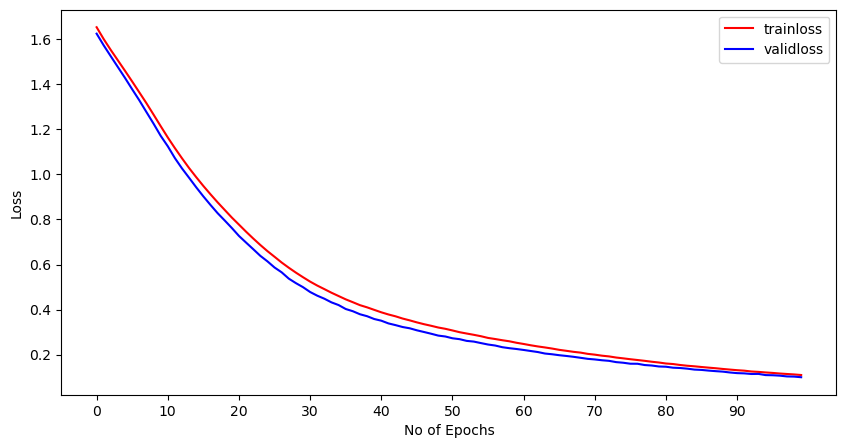

In [497]:
plt.figure(figsize = (10,5))
plt.plot(range(len(trainloss)), trainloss ,c='red',)
plt.plot(range(len(trainloss)),validloss ,c='blue')
plt.xticks(np.arange(0,len(trainloss),10))
plt.legend(['trainloss','validloss'])
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.show()


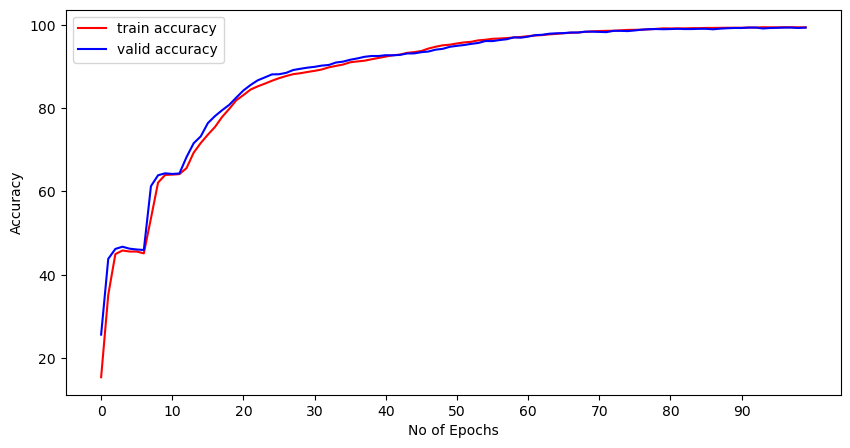

In [498]:
plt.figure(figsize = (10,5))
plt.plot(range(len(trainacc)), trainacc ,c='red',)
plt.plot(range(len(trainacc)),validacc ,c='blue')
plt.xticks(np.arange(0,len(trainloss),10))
plt.legend(['train accuracy','valid accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.show()


As seen in the two graphs above, the loss reduced drastically and accuracy increased over a very large number of epochs

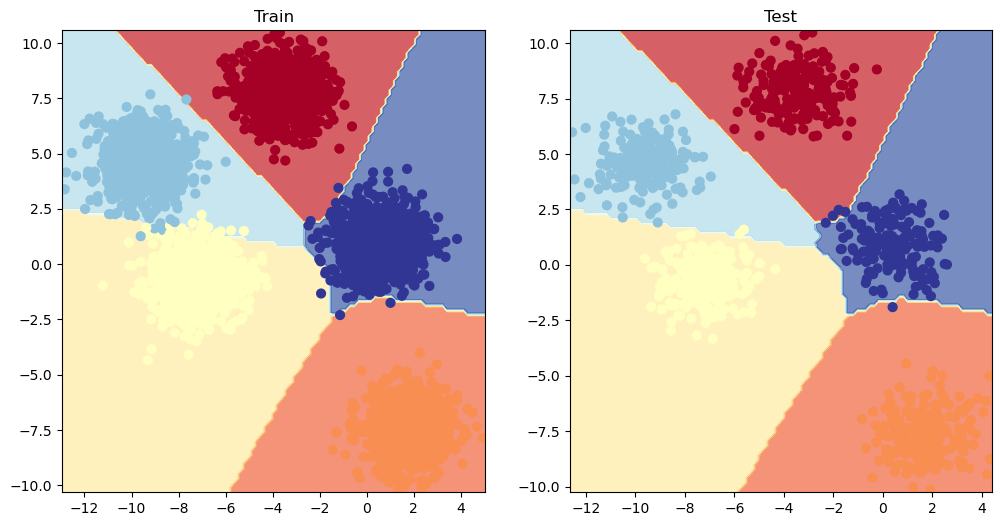

In [499]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, x_train,y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)